#STEPS

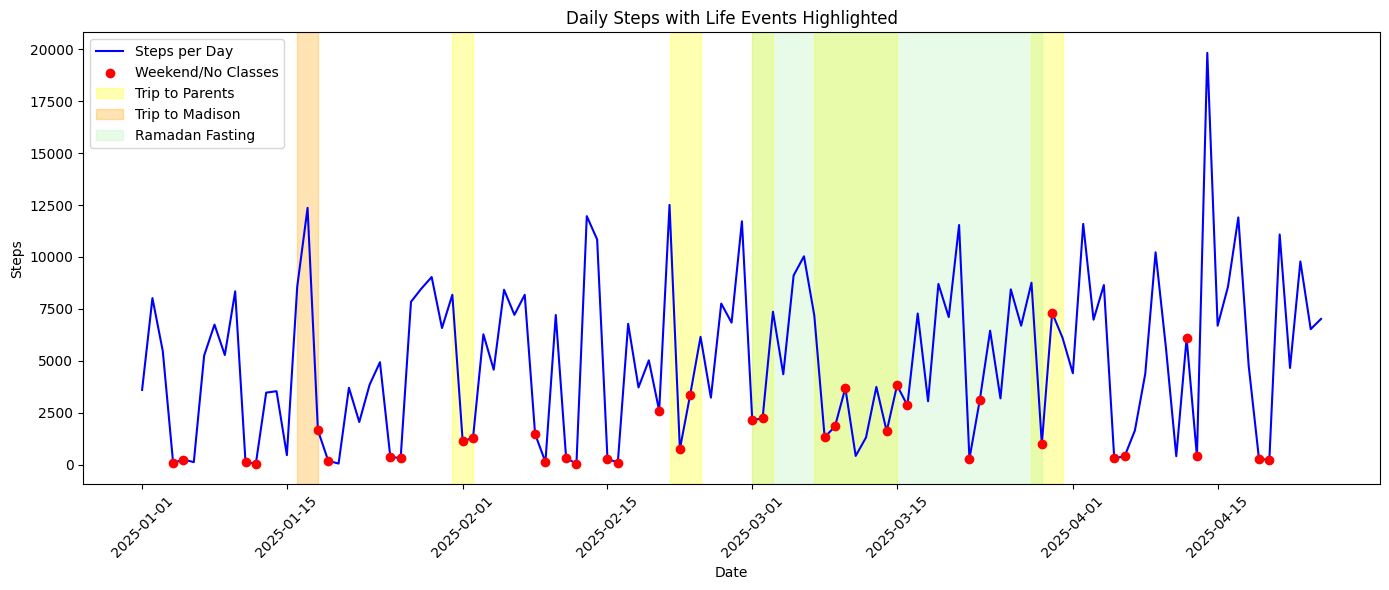

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

# Load the steps data
steps_df = pd.read_excel('Steps.xlsx')

# Convert 'Date' to datetime
steps_df['Date'] = pd.to_datetime(steps_df['Date'])

# Mark weekends
steps_df['Weekend'] = steps_df['Day'].isin(['Saturday', 'Sunday'])

# Load the timeline events from the JSON
with open('Timeline.json', 'r') as f:
    timeline = json.load(f)

# Initialize event lists
no_classes_dates = []
trip_madison_periods = []
trip_parents_periods = []
ramadan_period = None

# Process events
for event in timeline['life_events']:
    event_name = event['event']
    if 'date' in event:
        dates = event['date']
        # Some entries use list for single date
        if isinstance(dates, list):
            dates = [pd.to_datetime(d) for d in dates]
        else:
            dates = [pd.to_datetime(dates)]
    elif 'date_range' in event:
        dates = [pd.to_datetime(d) for d in event['date_range']]
    else:
        continue

    if event_name == 'No Classes':
        no_classes_dates.extend(dates)
    elif event_name == 'Trip to Visit Parents':
        trip_parents_periods.append((min(dates), max(dates)))
    elif event_name == 'Trip to Madison':
        trip_madison_periods.append((min(dates), max(dates)))
    elif event_name == 'Ramadan Fasting':
        ramadan_period = (min(dates), max(dates))

# Create plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot steps as a blue line
ax.plot(steps_df['Date'], steps_df['Steps'], label='Steps per Day', color='blue')

# Plot red dots for weekends and no-class days
highlight_dates = steps_df[(steps_df['Weekend']) | (steps_df['Date'].isin(no_classes_dates))]
ax.scatter(highlight_dates['Date'], highlight_dates['Steps'], color='red', zorder=5, label='Weekend/No Classes')

# Highlight trip periods: different colors for Madison vs Parents
for start, end in trip_parents_periods:
    ax.axvspan(start, end, color='yellow', alpha=0.3, label='Trip to Parents')

for start, end in trip_madison_periods:
    ax.axvspan(start, end, color='orange', alpha=0.3, label='Trip to Madison')

# Highlight Ramadan period
if ramadan_period:
    ax.axvspan(ramadan_period[0], ramadan_period[1], color='lightgreen', alpha=0.2, label='Ramadan Fasting')

# Prevent duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Labels and formatting
ax.set_xlabel('Date')
ax.set_ylabel('Steps')
ax.set_title('Daily Steps with Life Events Highlighted')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# 1. Create event features (Weekend, No Class Day, Trip Parents, Trip Madison, Ramadan)
steps_df['Weekend'] = steps_df['Day'].isin(['Saturday', 'Sunday']).astype(int)

# Initialize columns for events
steps_df['No_Class_Day'] = 0
steps_df['Trip_Parents'] = 0
steps_df['Trip_Madison'] = 0
steps_df['Ramadan'] = 0

# Process events from the already loaded timeline
for event in timeline['life_events']:
    event_name = event['event']
    if 'date' in event:
        dates = event['date']
        if isinstance(dates, list):
            dates = [pd.to_datetime(d) for d in dates]
        else:
            dates = [pd.to_datetime(dates)]
    elif 'date_range' in event:
        dates = [pd.to_datetime(d) for d in event['date_range']]
    else:
        continue

    # Expand date ranges into full daily periods
    start = min(dates)
    end = max(dates)
    event_days = pd.date_range(start, end)

    # Assign event flags based on the event name
    if event_name == 'No Classes':
        steps_df.loc[steps_df['Date'].isin(event_days), 'No_Class_Day'] = 1
    elif event_name == 'Trip to Visit Parents':
        steps_df.loc[steps_df['Date'].isin(event_days), 'Trip_Parents'] = 1
    elif event_name == 'Trip to Madison':
        steps_df.loc[steps_df['Date'].isin(event_days), 'Trip_Madison'] = 1
    elif event_name == 'Ramadan Fasting':
        steps_df.loc[steps_df['Date'].isin(event_days), 'Ramadan'] = 1

# 2. Compute Pearson correlation between steps and events
corr_matrix = steps_df[['Steps', 'Weekend', 'No_Class_Day', 'Trip_Parents', 'Trip_Madison', 'Ramadan']].corr()

# 3. Extract correlation of Steps with each event and display results
steps_correlation = corr_matrix['Steps'].drop('Steps')

print("\nPearson Correlation between Steps and Life Events:")
print(steps_correlation)



Pearson Correlation between Steps and Life Events:
Weekend        -0.576665
No_Class_Day   -0.232243
Trip_Parents   -0.121111
Trip_Madison    0.108178
Ramadan        -0.031051
Name: Steps, dtype: float64


#Insta Activity

In [ ]:
import json
import pandas as pd
from datetime import datetime

# Load the Insta JSON data
with open('Insta.json', 'r') as f:
    insta_data = json.load(f)

# Initialize an empty list to store the dates
dates = []

# Loop through each media item and extract the timestamps
for media in insta_data['likes_media_likes']:
    for item in media['string_list_data']:
        timestamp = item['timestamp']
        # Convert timestamp to datetime
        date = datetime.utcfromtimestamp(timestamp)
        # Convert to mm-dd-yyyy format
        formatted_date = date.strftime('%m-%d-%Y')
        dates.append(formatted_date)

# Create a DataFrame to count the occurrences of each date
date_counts = pd.DataFrame(dates, columns=['Date'])
date_counts['count'] = date_counts.groupby('Date')['Date'].transform('count')

# Remove duplicate dates, keeping only one entry per date
date_counts = date_counts.drop_duplicates(subset=['Date'])

# Save the result to an Excel file
date_counts.to_excel('Insta_likes_count.xlsx', index=False)

print("Data has been saved to Insta_likes_count.xlsx")


Data has been saved to Insta_likes_count.xlsx


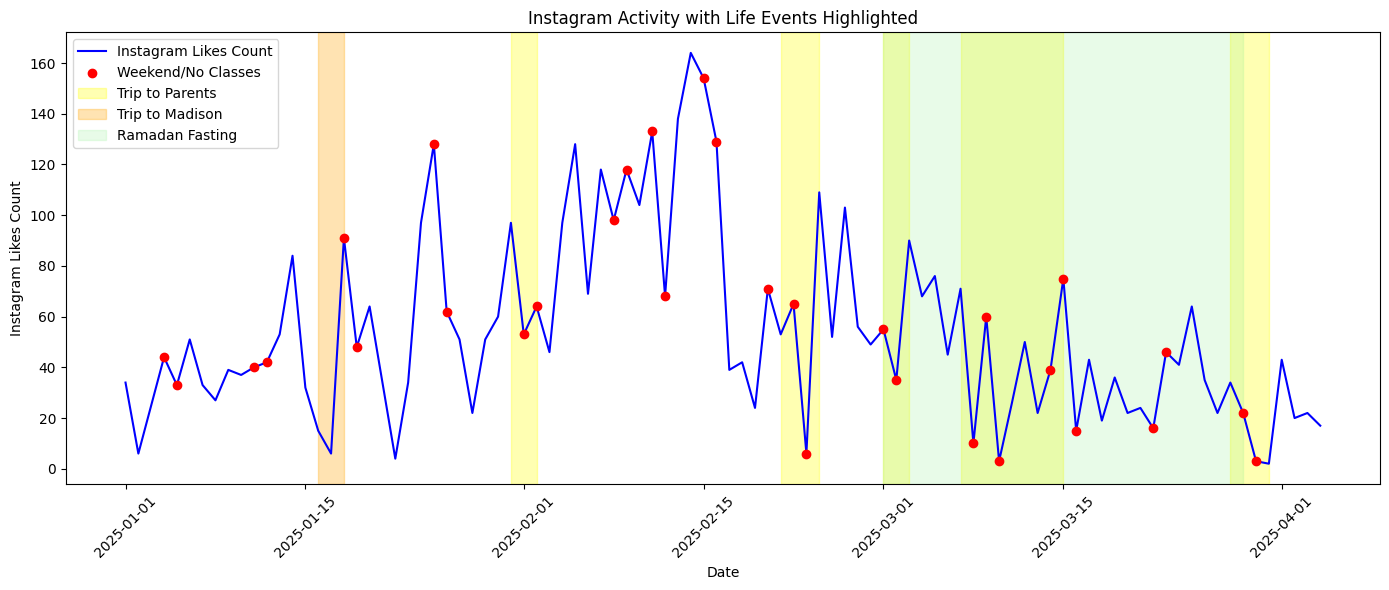

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

# Load the Instagram activity data
insta_df = pd.read_excel('Insta_likes_count.xlsx')

# Convert 'Date' to datetime
insta_df['Date'] = pd.to_datetime(insta_df['Date'], format='%m-%d-%Y')

# Load the timeline events from the JSON
with open('Timeline.json', 'r') as f:
    timeline = json.load(f)

# Initialize event lists
no_classes_dates = []
trip_madison_periods = []
trip_parents_periods = []
ramadan_period = None

# Process events
for event in timeline['life_events']:
    event_name = event['event']
    if 'date' in event:
        dates = event['date']
        # Some entries use list for single date
        if isinstance(dates, list):
            dates = [pd.to_datetime(d) for d in dates]
        else:
            dates = [pd.to_datetime(dates)]
    elif 'date_range' in event:
        dates = [pd.to_datetime(d) for d in event['date_range']]
    else:
        continue

    if event_name == 'No Classes':
        no_classes_dates.extend(dates)
    elif event_name == 'Trip to Visit Parents':
        trip_parents_periods.append((min(dates), max(dates)))
    elif event_name == 'Trip to Madison':
        trip_madison_periods.append((min(dates), max(dates)))
    elif event_name == 'Ramadan Fasting':
        ramadan_period = (min(dates), max(dates))

# Create plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot Instagram likes count as a blue line
ax.plot(insta_df['Date'], insta_df['Count'], label='Instagram Likes Count', color='blue')

# Plot red dots for weekends and no-class days
highlight_dates = insta_df[(insta_df['Date'].dt.weekday >= 5) | (insta_df['Date'].isin(no_classes_dates))]
ax.scatter(highlight_dates['Date'], highlight_dates['Count'], color='red', zorder=5, label='Weekend/No Classes')

# Highlight trip periods: different colors for Madison vs Parents
for start, end in trip_parents_periods:
    ax.axvspan(start, end, color='yellow', alpha=0.3, label='Trip to Parents')

for start, end in trip_madison_periods:
    ax.axvspan(start, end, color='orange', alpha=0.3, label='Trip to Madison')

# Highlight Ramadan period
if ramadan_period:
    ax.axvspan(ramadan_period[0], ramadan_period[1], color='lightgreen', alpha=0.2, label='Ramadan Fasting')

# Prevent duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Labels and formatting
ax.set_xlabel('Date')
ax.set_ylabel('Instagram Likes Count')
ax.set_title('Instagram Activity with Life Events Highlighted')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Initialize event columns
insta_df['Weekend'] = insta_df['Date'].dt.weekday.isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday
insta_df['No_Class_Day'] = 0
insta_df['Trip_Parents'] = 0
insta_df['Trip_Madison'] = 0
insta_df['Ramadan'] = 0

# Process events from the timeline
for event in timeline['life_events']:
    event_name = event['event']
    if 'date' in event:
        dates = event['date']
        # Handle single dates or list of dates
        if isinstance(dates, list):
            dates = [pd.to_datetime(d) for d in dates]
        else:
            dates = [pd.to_datetime(dates)]
    elif 'date_range' in event:
        dates = [pd.to_datetime(d) for d in event['date_range']]
    else:
        continue

    # Expand date ranges into full daily periods
    start = min(dates)
    end = max(dates)
    event_days = pd.date_range(start, end)

    # Assign event flags to the appropriate dates
    if event_name == 'No Classes':
        insta_df.loc[insta_df['Date'].isin(event_days), 'No_Class_Day'] = 1
    elif event_name == 'Trip to Visit Parents':
        insta_df.loc[insta_df['Date'].isin(event_days), 'Trip_Parents'] = 1
    elif event_name == 'Trip to Madison':
        insta_df.loc[insta_df['Date'].isin(event_days), 'Trip_Madison'] = 1
    elif event_name == 'Ramadan Fasting':
        insta_df.loc[insta_df['Date'].isin(event_days), 'Ramadan'] = 1

# Compute the Pearson correlation between Instagram likes and events
corr_matrix = insta_df[['Count', 'Weekend', 'No_Class_Day', 'Trip_Parents', 'Trip_Madison', 'Ramadan']].corr()

# Extract the correlation of 'Count' with each event and display results
insta_correlation = corr_matrix['Count'].drop('Count')

print("\nPearson Correlation between Instagram Likes and Life Events:")
print(insta_correlation)


Pearson Correlation between Instagram Likes and Life Events:
Weekend         0.072161
No_Class_Day   -0.019859
Trip_Parents   -0.132063
Trip_Madison   -0.082107
Ramadan        -0.250865
Name: Count, dtype: float64


#Browsing

In [ ]:
import pandas as pd
from datetime import datetime

# Load the Browsing CSV data
browsing_df = pd.read_csv('Browsing.csv', sep='\t')

# Convert 'Visit Time' to datetime and format to mm-dd-yyyy
browsing_df['Visit Time'] = pd.to_datetime(browsing_df['Visit Time'], errors='coerce')
browsing_df['Date'] = browsing_df['Visit Time'].dt.strftime('%m-%d-%Y')

# Drop rows where conversion failed (if any)
browsing_df = browsing_df.dropna(subset=['Date'])

# Count the number of visits per date
date_counts = browsing_df.groupby('Date').size().reset_index(name='Count')

# Save the result to an Excel file
date_counts.to_excel('Browsing_visit_count.xlsx', index=False)

print("Data has been saved to Browsing_visit_count.xlsx")

Data has been saved to Browsing_visit_count.xlsx


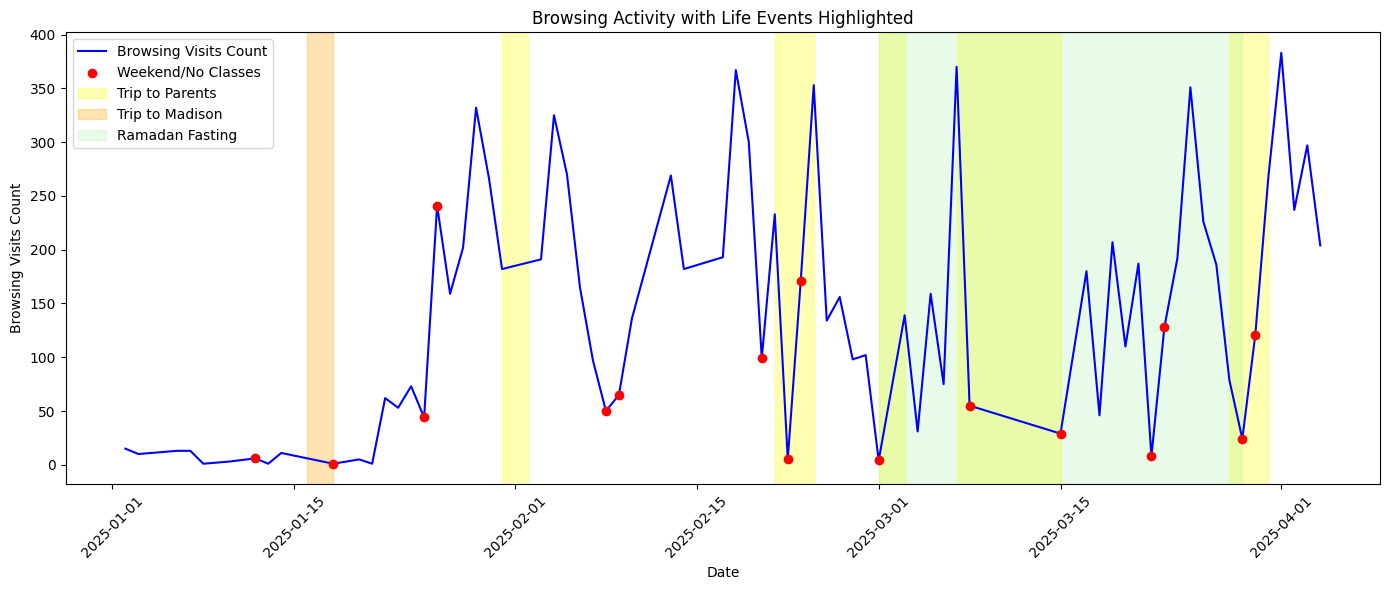

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

# Load the Browsing activity data
browsing_df = pd.read_excel('Browsing_visit_count.xlsx')

# Convert 'Date' to datetime
browsing_df['Date'] = pd.to_datetime(browsing_df['Date'], format='%m-%d-%Y')

# Load the timeline events from the JSON
with open('Timeline.json', 'r') as f:
    timeline = json.load(f)

# Initialize event lists
no_classes_dates = []
trip_madison_periods = []
trip_parents_periods = []
ramadan_period = None

# Process events
for event in timeline['life_events']:
    event_name = event['event']
    if 'date' in event:
        dates = event['date']
        # Some entries use list for single date
        if isinstance(dates, list):
            dates = [pd.to_datetime(d) for d in dates]
        else:
            dates = [pd.to_datetime(dates)]
    elif 'date_range' in event:
        dates = [pd.to_datetime(d) for d in event['date_range']]
    else:
        continue

    if event_name == 'No Classes':
        no_classes_dates.extend(dates)
    elif event_name == 'Trip to Visit Parents':
        trip_parents_periods.append((min(dates), max(dates)))
    elif event_name == 'Trip to Madison':
        trip_madison_periods.append((min(dates), max(dates)))
    elif event_name == 'Ramadan Fasting':
        ramadan_period = (min(dates), max(dates))

# Create plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot Browisng Visits as a blue line
ax.plot(browsing_df['Date'], browsing_df['Count'], label='Browsing Visits Count', color='blue')

# Plot red dots for weekends and no-class days
highlight_dates = browsing_df[(browsing_df['Date'].dt.weekday >= 5) | (browsing_df['Date'].isin(no_classes_dates))]
ax.scatter(highlight_dates['Date'], highlight_dates['Count'], color='red', zorder=5, label='Weekend/No Classes')

# Highlight trip periods: different colors for Madison vs Parents
for start, end in trip_parents_periods:
    ax.axvspan(start, end, color='yellow', alpha=0.3, label='Trip to Parents')

for start, end in trip_madison_periods:
    ax.axvspan(start, end, color='orange', alpha=0.3, label='Trip to Madison')

# Highlight Ramadan period
if ramadan_period:
    ax.axvspan(ramadan_period[0], ramadan_period[1], color='lightgreen', alpha=0.2, label='Ramadan Fasting')

# Prevent duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Labels and formatting
ax.set_xlabel('Date')
ax.set_ylabel('Browsing Visits Count')
ax.set_title('Browsing Activity with Life Events Highlighted')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Initialize event columns
browsing_df['Weekend'] = browsing_df['Date'].dt.weekday.isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday
browsing_df['No_Class_Day'] = 0
browsing_df['Trip_Parents'] = 0
browsing_df['Trip_Madison'] = 0
browsing_df['Ramadan'] = 0

# Process events from the timeline
for event in timeline['life_events']:
    event_name = event['event']
    if 'date' in event:
        dates = event['date']
        # Handle single dates or list of dates
        if isinstance(dates, list):
            dates = [pd.to_datetime(d) for d in dates]
        else:
            dates = [pd.to_datetime(dates)]
    elif 'date_range' in event:
        dates = [pd.to_datetime(d) for d in event['date_range']]
    else:
        continue

    # Expand date ranges into full daily periods
    start = min(dates)
    end = max(dates)
    event_days = pd.date_range(start, end)

    # Assign event flags to the appropriate dates
    if event_name == 'No Classes':
        browsing_df.loc[browsing_df['Date'].isin(event_days), 'No_Class_Day'] = 1
    elif event_name == 'Trip to Visit Parents':
        browsing_df.loc[browsing_df['Date'].isin(event_days), 'Trip_Parents'] = 1
    elif event_name == 'Trip to Madison':
        browsing_df.loc[browsing_df['Date'].isin(event_days), 'Trip_Madison'] = 1
    elif event_name == 'Ramadan Fasting':
        browsing_df.loc[browsing_df['Date'].isin(event_days), 'Ramadan'] = 1

# Compute the Pearson correlation between Browsing Visits and events
corr_matrix = browsing_df[['Count', 'Weekend', 'No_Class_Day', 'Trip_Parents', 'Trip_Madison', 'Ramadan']].corr()

# Extract the correlation of 'Count' with each event and display results
browsing_correlation = corr_matrix['Count'].drop('Count')

print("\nPearson Correlation between Browsing Visits and Life Events:")
print(browsing_correlation)


Pearson Correlation between Browsing Visits and Life Events:
Weekend        -0.354990
No_Class_Day   -0.043989
Trip_Parents    0.022176
Trip_Madison   -0.148772
Ramadan        -0.043331
Name: Count, dtype: float64


#Snapchat Processing

In [ ]:
import json
import pandas as pd
from datetime import datetime

# Load the chat history JSON data
with open('chat_history.json', 'r') as f:
    chat_data = json.load(f)

# Initialize an empty list to store the dates
dates = []

# Loop through each conversation and extract 'Created' timestamps
for conversation in chat_data.values():
    for message in conversation:
        created_time = message['Created']
        # Parse the UTC datetime string
        date_obj = datetime.strptime(created_time, '%Y-%m-%d %H:%M:%S UTC')
        # Format to mm-dd-yyyy
        formatted_date = date_obj.strftime('%m-%d-%Y')
        dates.append(formatted_date)

# Create a DataFrame with the dates
date_counts = pd.DataFrame(dates, columns=['Date'])

# Count number of messages per date
date_counts = date_counts.groupby('Date').size().reset_index(name='Count')

# Convert 'Date' to datetime for proper alignment
date_counts['Date'] = pd.to_datetime(date_counts['Date'], format='%m-%d-%Y')

# Create a full date range from 01-01-2025 to 04-04-2025
full_dates = pd.DataFrame({'Date': pd.date_range(start='2025-01-01', end='2025-04-04')})

# Merge the actual counts onto the full date range
full_date_counts = pd.merge(full_dates, date_counts, on='Date', how='left')

# Fill missing counts with 0
full_date_counts['Count'] = full_date_counts['Count'].fillna(0).astype(int)

# Format 'Date' back to mm-dd-yyyy
full_date_counts['Date'] = full_date_counts['Date'].dt.strftime('%m-%d-%Y')

# Save the complete result to an Excel file
full_date_counts.to_excel('Chat_message_counts.xlsx', index=False)

print("Full Chat message counts have been saved to Chat_message_counts.xlsx")


Full Chat message counts have been saved to Chat_message_counts.xlsx


In [ ]:
import json
import pandas as pd
from datetime import datetime

# Load the snap history JSON data
with open('snap_history.json', 'r') as f:
    snap_data = json.load(f)

# Initialize an empty list to store the dates
dates = []

# Loop through each conversation and extract 'Created' timestamps
for conversation in snap_data.values():
    for message in conversation:
        created_time = message['Created']
        # Parse the UTC datetime string
        date_obj = datetime.strptime(created_time, '%Y-%m-%d %H:%M:%S UTC')
        # Format to mm-dd-yyyy
        formatted_date = date_obj.strftime('%m-%d-%Y')
        dates.append(formatted_date)

# Create a DataFrame with the dates
date_counts = pd.DataFrame(dates, columns=['Date'])

# Group by Date and count the number of snaps
date_counts = date_counts.groupby('Date').size().reset_index(name='Count')

# Convert 'Date' to datetime format
date_counts['Date'] = pd.to_datetime(date_counts['Date'], format='%m-%d-%Y')

# Create a complete date range from 01-01-2025 to 04-04-2025
full_dates = pd.DataFrame({'Date': pd.date_range(start='2025-01-01', end='2025-04-04')})

# Merge the actual snap counts with the complete date range
full_date_counts = pd.merge(full_dates, date_counts, on='Date', how='left')

# Fill missing counts with 0
full_date_counts['Count'] = full_date_counts['Count'].fillna(0).astype(int)

# Format 'Date' back to mm-dd-yyyy for saving
full_date_counts['Date'] = full_date_counts['Date'].dt.strftime('%m-%d-%Y')

# Save the result to an Excel file
full_date_counts.to_excel('Snap_message_counts.xlsx', index=False)

print("Data has been saved to Snap_message_counts.xlsx")

Data has been saved to Snap_message_counts.xlsx


In [ ]:
import pandas as pd

# Load the memories Excel file
memories_df = pd.read_excel('Memories.xlsx')

# Ensure the 'Date' column is properly parsed as datetime
memories_df['Date'] = pd.to_datetime(memories_df['Date'])

# Group by date and count occurrences
date_counts = memories_df.groupby(memories_df['Date'].dt.date).size().reset_index(name='Count')

# Convert 'Date' back to datetime
date_counts['Date'] = pd.to_datetime(date_counts['Date'])

# Create a complete date range from 01-01-2025 to 04-04-2025
full_dates = pd.DataFrame({'Date': pd.date_range(start='2025-01-01', end='2025-04-04')})

# Merge actual counts with full date range
full_date_counts = pd.merge(full_dates, date_counts, on='Date', how='left')

# Fill missing counts with 0
full_date_counts['Count'] = full_date_counts['Count'].fillna(0).astype(int)

# Format 'Date' back to mm-dd-yyyy for saving
full_date_counts['Date'] = full_date_counts['Date'].dt.strftime('%m-%d-%Y')

# Save the result to a new Excel file
full_date_counts.to_excel('Memories_date_counts.xlsx', index=False)

print("Data has been saved to Memories_date_counts.xlsx")

Data has been saved to Memories_date_counts.xlsx


#Snapchat

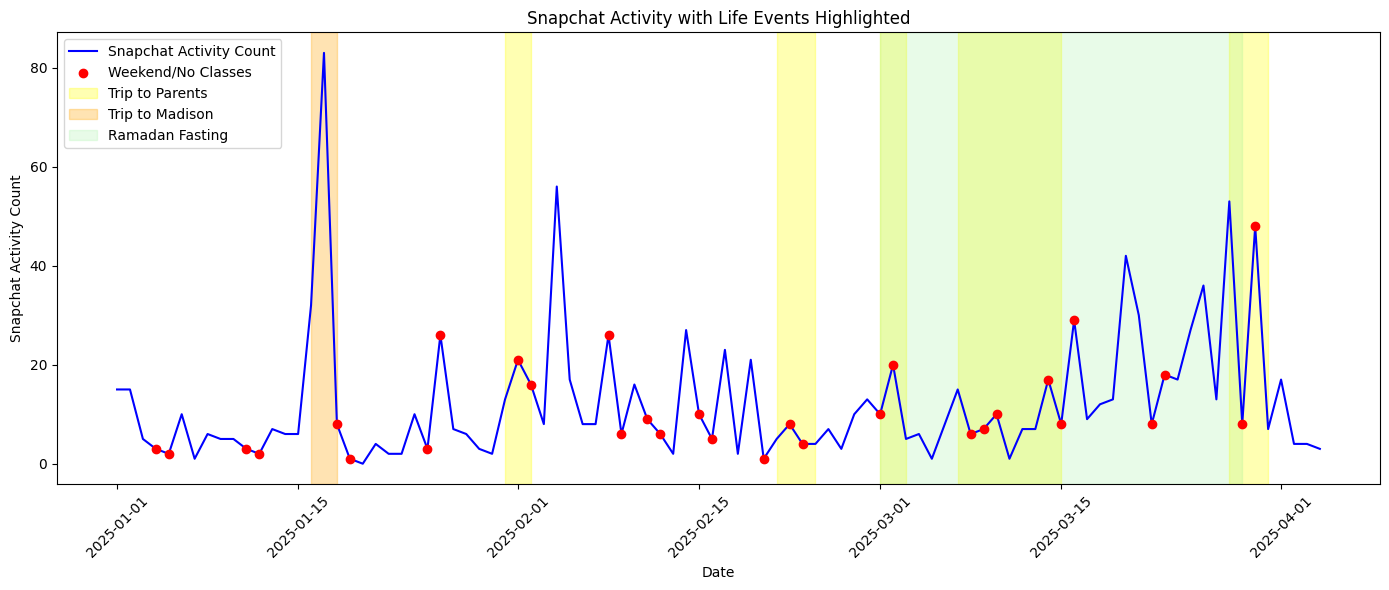

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

# Load the snapchat activity data
snapchat_df = pd.read_excel('Snapchat_Activity_Counts.xlsx')

# Convert 'Date' to datetime
snapchat_df['Date'] = pd.to_datetime(snapchat_df['Date'], format='%m-%d-%Y')

# Load the timeline events from the JSON
with open('Timeline.json', 'r') as f:
    timeline = json.load(f)

# Initialize event lists
no_classes_dates = []
trip_madison_periods = []
trip_parents_periods = []
ramadan_period = None

# Process events
for event in timeline['life_events']:
    event_name = event['event']
    if 'date' in event:
        dates = event['date']
        # Some entries use list for single date
        if isinstance(dates, list):
            dates = [pd.to_datetime(d) for d in dates]
        else:
            dates = [pd.to_datetime(dates)]
    elif 'date_range' in event:
        dates = [pd.to_datetime(d) for d in event['date_range']]
    else:
        continue

    if event_name == 'No Classes':
        no_classes_dates.extend(dates)
    elif event_name == 'Trip to Visit Parents':
        trip_parents_periods.append((min(dates), max(dates)))
    elif event_name == 'Trip to Madison':
        trip_madison_periods.append((min(dates), max(dates)))
    elif event_name == 'Ramadan Fasting':
        ramadan_period = (min(dates), max(dates))

# Create plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot snapchat Visits as a blue line
ax.plot(snapchat_df['Date'], snapchat_df['Total'], label='Snapchat Activity Count', color='blue')

# Plot red dots for weekends and no-class days
highlight_dates = snapchat_df[(snapchat_df['Date'].dt.weekday >= 5) | (snapchat_df['Date'].isin(no_classes_dates))]
ax.scatter(highlight_dates['Date'], highlight_dates['Total'], color='red', zorder=5, label='Weekend/No Classes')

# Highlight trip periods: different colors for Madison vs Parents
for start, end in trip_parents_periods:
    ax.axvspan(start, end, color='yellow', alpha=0.3, label='Trip to Parents')

for start, end in trip_madison_periods:
    ax.axvspan(start, end, color='orange', alpha=0.3, label='Trip to Madison')

# Highlight Ramadan period
if ramadan_period:
    ax.axvspan(ramadan_period[0], ramadan_period[1], color='lightgreen', alpha=0.2, label='Ramadan Fasting')

# Prevent duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Labels and formatting
ax.set_xlabel('Date')
ax.set_ylabel('Snapchat Activity Count')
ax.set_title('Snapchat Activity with Life Events Highlighted')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Initialize event columns
snapchat_df['Weekend'] = snapchat_df['Date'].dt.weekday.isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday
snapchat_df['No_Class_Day'] = 0
snapchat_df['Trip_Parents'] = 0
snapchat_df['Trip_Madison'] = 0
snapchat_df['Ramadan'] = 0

# Process events from the timeline
for event in timeline['life_events']:
    event_name = event['event']
    if 'date' in event:
        dates = event['date']
        # Handle single dates or list of dates
        if isinstance(dates, list):
            dates = [pd.to_datetime(d) for d in dates]
        else:
            dates = [pd.to_datetime(dates)]
    elif 'date_range' in event:
        dates = [pd.to_datetime(d) for d in event['date_range']]
    else:
        continue

    # Expand date ranges into full daily periods
    start = min(dates)
    end = max(dates)
    event_days = pd.date_range(start, end)

    # Assign event flags to the appropriate dates
    if event_name == 'No Classes':
        snapchat_df.loc[snapchat_df['Date'].isin(event_days), 'No_Class_Day'] = 1
    elif event_name == 'Trip to Visit Parents':
        snapchat_df.loc[snapchat_df['Date'].isin(event_days), 'Trip_Parents'] = 1
    elif event_name == 'Trip to Madison':
        snapchat_df.loc[snapchat_df['Date'].isin(event_days), 'Trip_Madison'] = 1
    elif event_name == 'Ramadan Fasting':
        snapchat_df.loc[snapchat_df['Date'].isin(event_days), 'Ramadan'] = 1

# Compute the Pearson correlation between snapchat Visits and events
corr_matrix = snapchat_df[['Total', 'Weekend', 'No_Class_Day', 'Trip_Parents', 'Trip_Madison', 'Ramadan']].corr()

# Extract the correlation of 'Total' with each event and display results
snapchat_correlation = corr_matrix['Total'].drop('Total')

print("\nPearson Correlation between Snapchat Activity and Life Events:")
print(snapchat_correlation)


Pearson Correlation between Snapchat Activity and Life Events:
Weekend        -0.026739
No_Class_Day   -0.115631
Trip_Parents    0.029290
Trip_Madison    0.386603
Ramadan         0.145196
Name: Total, dtype: float64


#Modelling

In [ ]:
import pandas as pd
import json
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs

# 1. Load activity data
activity_df = pd.read_excel('Activity_All.xlsx')  # Assuming your provided table is saved as 'activity_data.xlsx'

# Ensure correct Date parsing
activity_df['Date'] = pd.to_datetime(activity_df['Date'], format='%m/%d/%Y')

# 2. Load life events JSON
with open('Timeline.json', 'r') as f:
    events_data = json.load(f)

# 3. Build list of all dates that are life events
event_dates = set()
for event in events_data['life_events']:
    if 'date_range' in event:
        for d in event['date_range']:
            event_dates.add(pd.to_datetime(d))
    elif 'date' in event:
        if isinstance(event['date'], list):
            for d in event['date']:
                event_dates.add(pd.to_datetime(d))
        else:
            event_dates.add(pd.to_datetime(event['date']))

# 4. Create event_day label
activity_df['event_day'] = activity_df['Date'].isin(event_dates).astype(int)

# 5. Features and target
X = activity_df[['Steps', 'Insta', 'Browsing', 'Snapchat']]
y = activity_df['event_day']

# 6. Impute missing values (NaNs) using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace NaNs with the mean of the column
X = imputer.fit_transform(X) # Apply imputation to the feature matrix

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Model Training

# Choose model: Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# 8. Evaluation

# Logistic Regression Results
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:,1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       0.00      0.00      0.00         5

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19

Logistic Regression ROC-AUC: 0.7


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


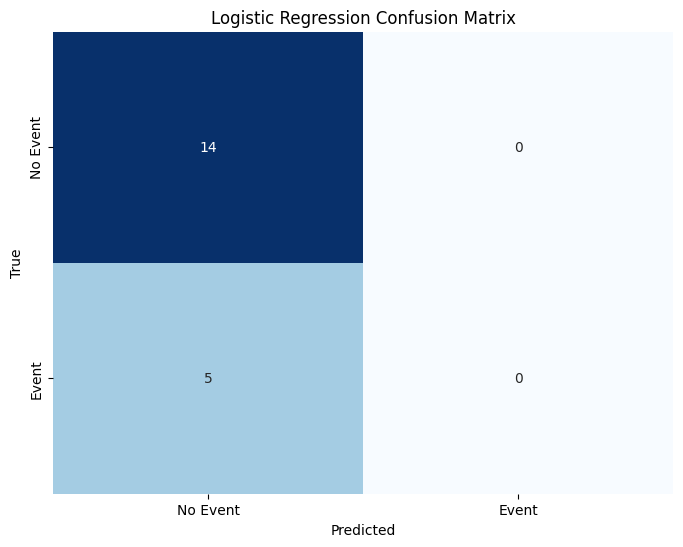

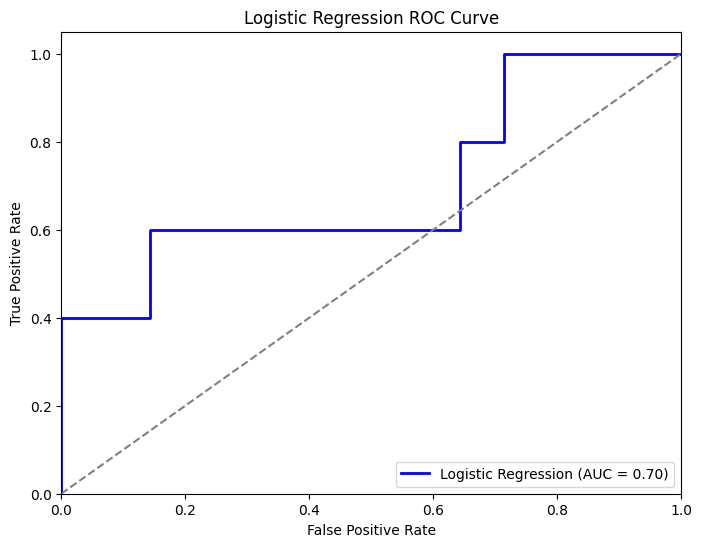

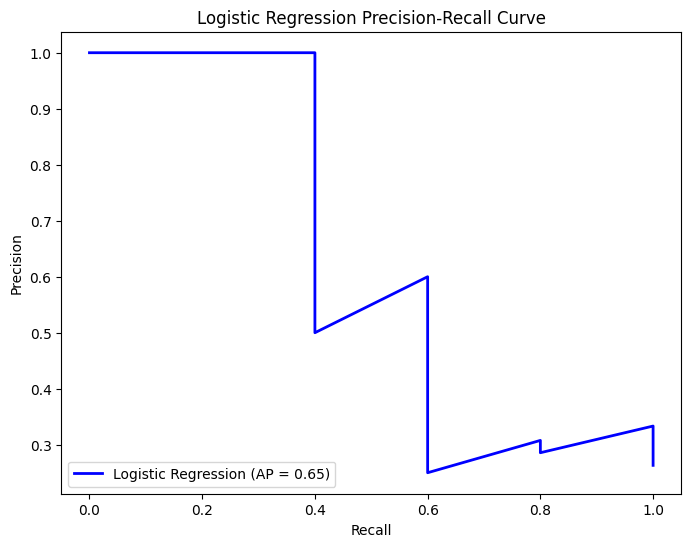

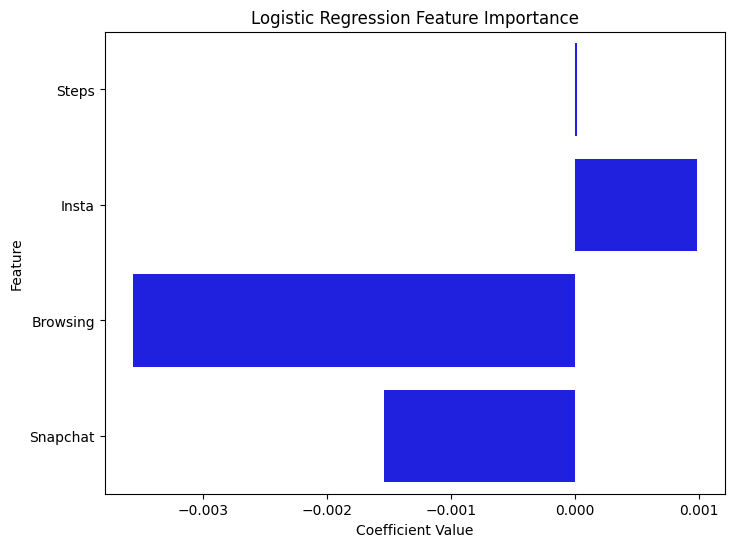

Logistic Regression Accuracy: 0.74


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have the following variables from your model evaluation:
y_true = y_test  # True labels
y_pred_logistic = y_pred_logistic  # Logistic Regression predictions
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:,1]  # Logistic Regression probabilities

# 1. Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_true, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Event', 'Event'], yticklabels=['No Event', 'Event'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_true, y_pred_proba_logistic)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Precision-Recall Curve for Logistic Regression
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_true, y_pred_proba_logistic)
avg_precision_log_reg = average_precision_score(y_true, y_pred_proba_logistic)

plt.figure(figsize=(8, 6))
plt.plot(recall_log_reg, precision_log_reg, color='blue', lw=2, label='Logistic Regression (AP = {:.2f})'.format(avg_precision_log_reg))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# 4. Feature Importance Visualization for Logistic Regression
# Logistic Regression Coefficients for feature importance
log_reg_coefs = logistic_model.coef_[0]
features = ['Steps', 'Insta', 'Browsing', 'Snapchat']

plt.figure(figsize=(8, 6))
sns.barplot(x=log_reg_coefs, y=features, color='blue')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# 5. Model Accuracy
accuracy_log_reg = logistic_model.score(X_test, y_true)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")


In [ ]:
import pandas as pd
import json
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer

# 1. Load activity data
activity_df = pd.read_excel('Activity_All.xlsx')  # Load your activity dataset

# Ensure correct Date parsing
activity_df['Date'] = pd.to_datetime(activity_df['Date'], format='%m/%d/%Y')

# 2. Load life events JSON (simplified version)
with open('Timeline_Modelling.json', 'r') as f:
    events_data = json.load(f)

# 3. Build set of all dates associated with any event
event_dates = set()

for event in events_data['life_events']:
    for d in event['dates']:
        parsed_date = pd.to_datetime(d)
        event_dates.add(parsed_date)

# 4. Create binary event label
# 1 = Event Day, 0 = No Event
activity_df['event_day'] = activity_df['Date'].isin(event_dates).astype(int)

# 5. Define features (X) and target (y)
X = activity_df[['Steps', 'Insta', 'Browsing', 'Snapchat']]
y = activity_df['event_day']

# 6. Impute missing values (handling NaNs)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 7. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Model Training
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# 9. Model Evaluation
y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
print("Logistic Regression ROC-AUC:", roc_auc)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.58      0.88      0.70         8

    accuracy                           0.68        19
   macro avg       0.72      0.71      0.68        19
weighted avg       0.74      0.68      0.68        19

Logistic Regression ROC-AUC: 0.7272727272727272


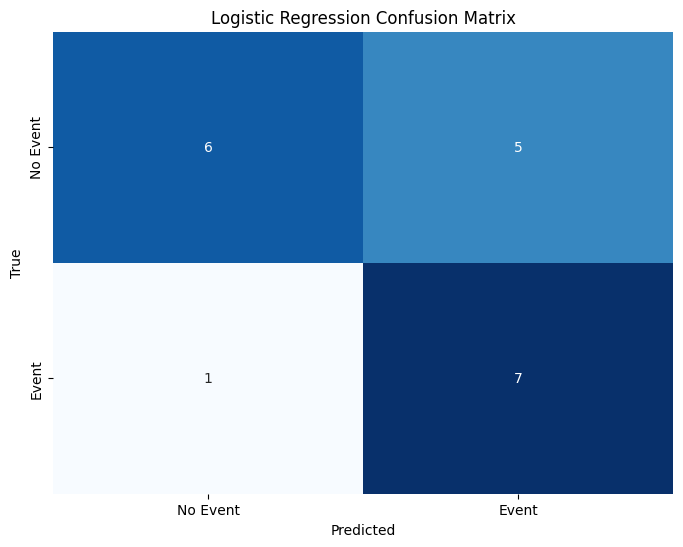

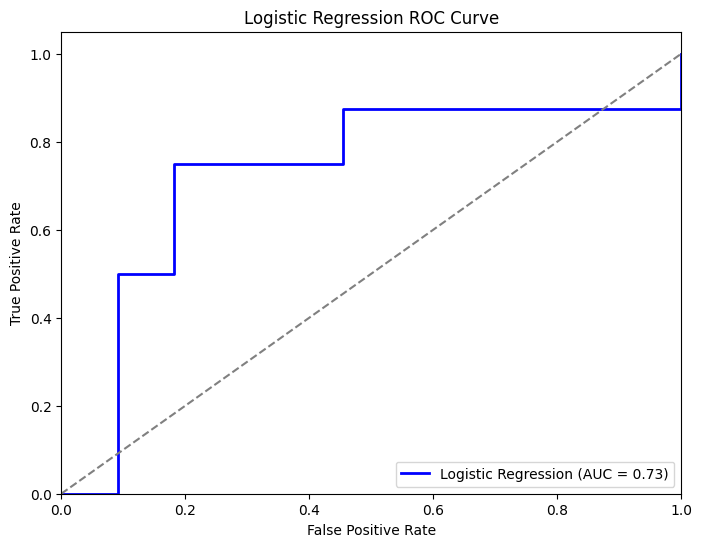

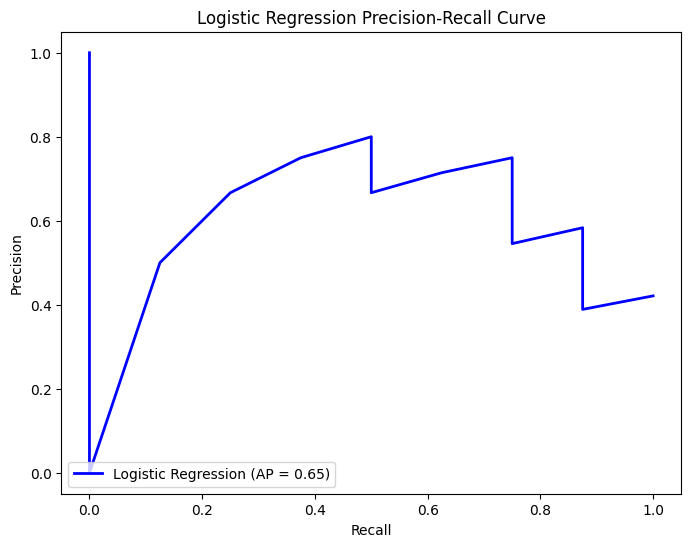

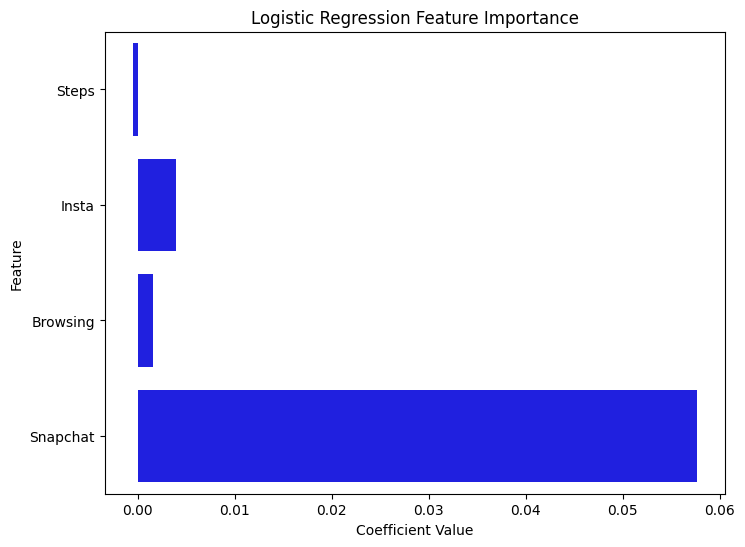

Logistic Regression Accuracy: 0.68


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have the following variables from your model evaluation:
y_true = y_test  # True labels
y_pred_logistic = y_pred_logistic  # Logistic Regression predictions
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:,1]  # Logistic Regression probabilities

# 1. Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_true, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Event', 'Event'], yticklabels=['No Event', 'Event'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_true, y_pred_proba_logistic)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Precision-Recall Curve for Logistic Regression
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_true, y_pred_proba_logistic)
avg_precision_log_reg = average_precision_score(y_true, y_pred_proba_logistic)

plt.figure(figsize=(8, 6))
plt.plot(recall_log_reg, precision_log_reg, color='blue', lw=2, label='Logistic Regression (AP = {:.2f})'.format(avg_precision_log_reg))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# 4. Feature Importance Visualization for Logistic Regression
# Logistic Regression Coefficients for feature importance
log_reg_coefs = logistic_model.coef_[0]
features = ['Steps', 'Insta', 'Browsing', 'Snapchat']

plt.figure(figsize=(8, 6))
sns.barplot(x=log_reg_coefs, y=features, color='blue')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# 5. Model Accuracy
accuracy_log_reg = logistic_model.score(X_test, y_true)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
